## March Madness Machine Learning Mania 2023!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
#import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

import os
import re
import xgboost as xgb

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.metrics import classification_report
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
#Keys to the teamIDs 
Key = pd.read_csv("march-machine-learning-mania-2023/MTeams.csv")
Key.drop(columns=['FirstD1Season','LastD1Season'],inplace=True)
Key.head()

TeamID     TeamName
0    1101  Abilene Chr
1    1102    Air Force
2    1103        Akron
3    1104      Alabama
4    1105  Alabama A&M

In [3]:
TeamID = Key['TeamID']
Key=Key.set_index(TeamID)
Key.drop(columns='TeamID',inplace=True)

In [4]:
DATA_PATH = 'march-machine-learning-mania-2023/'
print('All Files Used:')
for filename in os.listdir(DATA_PATH):
    print(filename) #so could i stop looking at the directory
                    #and also just general files i might use for the project

All Files Used:
MNCAATourneyDetailedResults.csv
WNCAATourneySlots.csv
MNCAATourneyCompactResults.csv
MSeasons.csv
WTeams.csv
MRegularSeasonDetailedResults.csv
WNCAATourneyDetailedResults.csv
MNCAATourneySlots.csv
MGameCities.csv
MConferenceTourneyGames.csv
WNCAATourneyCompactResults.csv
WSeasons.csv
Cities.csv
WRegularSeasonCompactResults.csv
WTeamSpellings.csv
WRegularSeasonDetailedResults.csv
MRegularSeasonCompactResults.csv
WNCAATourneySeeds.csv
MNCAATourneySeedRoundSlots.csv
WTeamConferences.csv
MTeamConferences.csv
MTeamCoaches.csv
SampleSubmission2023.csv
MMasseyOrdinals.csv
Conferences.csv
MTeams.csv
WGameCities.csv
MNCAATourneySeeds.csv
MSecondaryTourneyTeams.csv
MTeamSpellings.csv
MSecondaryTourneyCompactResults.csv


In [5]:
RegularDetail = pd.read_csv(DATA_PATH + 'MRegularSeasonDetailedResults.csv') #Regular season data main thin
display(RegularDetail.columns.values)

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [6]:
RegularDetail['ScoreMargin'] = RegularDetail['WScore'] - RegularDetail['LScore']

In [7]:
RegularDetail.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   ...  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  ScoreMargin  
0  ...    16    22   10   22     8   18     9     2   20            6  
1  ...     9    20   20   25     7   12     8     6   16            7  
2  ...    14    23   31   22     9   12     2     5   23           12  
3  ...     8    15   17   20     9   19     4     3   23            6  
4  ...    17    27   21   15    12   10     7     1   14            6  

[5 rows x 35 columns]

In [8]:
Game = pd.DataFrame()

Team = RegularDetail.copy()
Teams = RegularDetail.copy()

In [9]:
WinTeams = pd.DataFrame()
LostTeams = pd.DataFrame()
#Columns copy and pasted from RegularDetail columns
columns = ['Season', 'TeamID', 'Points', 'OppPoints',
           'Loc','NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 
           'OR', 'DR','Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA', 
           'OppFGM3', 'OppFGA3','OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO', 
           'OppStl', 'OppBlk', 'OppPF']

WinTeams[columns] = RegularDetail[['Season','WTeamID', 'WScore','LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]
WinTeams['Wins'] = 1 #winning team wins
WinTeams['Losses'] = 0 

LostTeams[columns] = RegularDetail[['Season', 'LTeamID', 'LScore', 'WScore',
                'WLoc','NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 
                'LOR', 'LDR','LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
                'WFGM3', 'WFGA3','WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
                'WStl', 'WBlk', 'WPF']]


def change_location(loc):
    if loc == 'H':
        return 'A'
    elif loc == 'A':
        return 'H'
    else:
        return 'N'


LostTeams['Loc'] = LostTeams['Loc'].apply(change_location)

LostTeams['Wins'] = 0 
LostTeams['Losses'] = 1 #winning team loses

WinLoseTeams = pd.concat([WinTeams, LostTeams]) #still game by game ie. Winner vs Loser
Teams = WinLoseTeams.groupby(['Season', 'TeamID']).sum() #now year by year based off team proformance
Teams['NumGames'] = Teams['Wins'] + Teams['Losses'] #To get team record per given year
display(Teams) 

Points  OppPoints                            Loc  NumOT  FGM  \
Season TeamID                                                                 
2003   1102      1603       1596   HAHAHAHHHHHHAAANHAAAAAHAAHHN      0  536   
       1103      2127       2110    AHHHHHAHHHAAHAHAAAAAHAHAHAH      8  733   
       1104      1940       1820   NHHNHHNHHHHHHHAHHAAAAHAAHAAN      1  673   
       1105      1866       1993     HAHAHHHAAHAAHAHHHAAHAAAHAA      4  634   
       1106      1781       1785   AHHHAAAHHHHHANNAAAHAAAHAAHAH      1  656   
...               ...        ...                            ...    ...  ...   
2023   1473      1694       1924     AHHAHHAANNAAAAAHAAHHAAHAAA      2  619   
       1474      2012       1986     HNNAAAAHAHHHAAAAAAHHAAAHHA      0  683   
       1475      1973       1995     HAHNHHHAAHHAAAAAAAAAHAHHAA      3  682   
       1476      1940       2058  ANAAHHAAHHAHHAHANAAHAAAAHHAAA      3  670   
       1477      1936       2044   ANAHAHAAHHAAANAAAAANAHAAHAHH      4  702   

                FGA  FGM3  FGA3  FTM  FTA  ...  OppOR  OppDR  OppAst  OppTO  \
Season TeamID                              ...                                
2003   1102    1114   219   583  312  479  ...    269    564     256    363   
       1103    1508   147   434  514  698  ...    325    595     418    414   
       1104    1601   178   556  416  586  ...    305    634     327    388   
       1105    1602   197   540  401  568  ...    343    686     411    489   
       1106    1548   171   494  298  461  ...    317    626     330    422   
...             ...   ...   ...  ...  ...  ...    ...    ...     ...    ...   
2023   1473    1477   188   530  268  369  ...    240    654     388    305   
       1474    1546   242   692  404  555  ...    216    619     359    274   
       1475    1587   254   677  355  524  ...    191    616     335    298   
       1476    1534   222   632  378  495  ...    276    710     408    372   
       1477    1589   225   730  307  444  ...    222    648     360    330   

               OppStl  OppBlk  OppPF  Wins  Losses  NumGames  
Season TeamID                                                 
2003   1102       152      44    514    12      16        28  
       1103       173      77    606    13      14        27  
       1104       155      89    539    17      11        28  
       1105       244     109    496     7      19        26  
       1106       246      89    452    13      15        28  
...               ...     ...    ...   ...     ...       ...  
2023   1473       186      82    374     6      20        26  
       1474       169     107    463    14      12        26  
       1475       164     110    480    12      14        26  
       1476       202      86    478    13      16        29  
       1477       180      66    455    11      17        28  

[7255 rows x 33 columns]

In [10]:

Reg_Season_Stats = pd.DataFrame()
# Win Ratio (How often a team wins)
Reg_Season_Stats['WinRatio'] = Teams['Wins'] / Teams['NumGames']
#Points Per Game
Reg_Season_Stats['PPG'] = Teams['Points'] / Teams['NumGames']
#Points Allowed Per Game
Reg_Season_Stats['Allowed_PPG'] = Teams['OppPoints'] / Teams['NumGames']
#Points Ratio
Reg_Season_Stats['PointRatio'] = Teams['Points'] / Teams['OppPoints']

Reg_Season_Stats.head()

WinRatio        PPG  Allowed_PPG  PointRatio
Season TeamID                                              
2003   1102    0.428571  57.250000    57.000000    1.004386
       1103    0.481481  78.777778    78.148148    1.008057
       1104    0.607143  69.285714    65.000000    1.065934
       1105    0.269231  71.769231    76.653846    0.936277
       1106    0.464286  63.607143    63.750000    0.997759

 * This is Game Stats I wanted to keep the variable name short
 * But these are the stats of each and every single game from 2003
 * That way we could more acurately get the regular season stats rather than doing it how i previously did it, bc I had some data leaks that ended up not being accurate to the actual stats

In [11]:
Game['Season'] = RegularDetail['Season']
Game['WTeamID'] = RegularDetail['WTeamID']
Game['LTeamID'] = RegularDetail['LTeamID']
display(Team.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'ScoreMargin'],
      dtype='object')

In [12]:
#Inputing basic Stats so we can get the mean when we groupBy all in one 
Game['WPoints'] = Team['WScore']
Game['LPoints'] = Team['LScore'] 
#Number of a Team's possesions
Game['WPos'] = (Team['WFGA'] - Team['WOR']) + Team['WTO'] + .44 * Team['WFTA']
Game['LPos'] = (Team['LFGA'] - Team['LOR']) + Team['LTO'] + .44 * Team['LFTA']
Team['WNumPos'] = Game['WPos']
Team['LNumPos'] = Game['LPos']
#Points Per Possesion
Game['WPPP'] = Team['WScore'] / Team['WNumPos']
Game['LPPP'] = Team['LScore'] / Team['LNumPos']
#Field Goal Percentage
Game['WFGP'] = ((Team['WScore'] - Team['WFTM']) / 2) / Team['WFGA']
Game['LFGP'] = ((Team['LScore'] - Team['LFTM']) / 2) / Team['LFGA']
#Turn Over Rate
Game['WTORate'] = Team['WTO'] / Team['WNumPos']
Game['LTORate'] = Team['LTO'] / Team['LNumPos']
#Offensive Field Goal Efficency
Game['WOff_eFG'] = (Team['WFGM'] + 0.5 * Team['WFGM3']) / Team['WFGA']
Game['LOff_eFG'] = (Team['LFGM'] + 0.5 * Team['LFGM3']) / Team['LFGA']
#Defensive Field Goal Efficency
Game['WDef_eFG'] = (Team['LFGM'] + 0.5 * Team['LFGM3']) / Team['LFGA']
Game['LDef_eFG'] = (Team['WFGM'] + 0.5 * Team['WFGM3']) / Team['WFGA']
#Offensive Rebound Percentage
Game['WORB'] = Team['WOR'] / (Team['WOR'] + Team['LDR'])
Game['LORB'] = Team['LOR'] / (Team['LOR'] + Team['WDR'])
#Defensive Rebound Percentage
Game['WDRB'] = Team['WDR'] / (Team['LOR'] + Team['WDR'])
Game['LDRB'] = Team['LDR'] / (Team['WOR'] + Team['LDR'])
#Percentage of Field Goals Assisted
Game['WFGAst'] = Team['WAst'] / Team['WFGM']
Game['LFGAst'] = Team['LAst'] / Team['LFGM']
#Assists to Turnover Ratio
Game['WAstTO'] = Team['WAst'] / Team['WTO']
Game['LAstTO'] = Team['LAst'] / Team['LTO']
#Percentage of Shots beyond the arc (Three Point Line)
Game['WArcPct'] = Team['WFGA3'] / Team['WFGA']
Game['LArcPct'] = Team['LFGA3'] / Team['LFGA']
#Free Throw Percentage
Game['WFTP'] = Team['WFTM'] / Team['WFTA']
Game['LFTP'] = Team['LFTM'] / Team['LFTA']
#Free Throw Rate (Free Throws per FGAs)
Game['WFT_Rate'] = Team['WFTA'] / Team['WFGA']
Game['LFT_Rate'] = Team['LFTA'] / Team['LFGA']
#True Shooting Attempts
Game['WTSA'] = Team['WFGA'] + 0.4 * Team['WFTA']
Game['LTSA'] = Team['LFGA'] + 0.4 * Team['LFTA']

Team['WTSA'] = Game['WTSA']
Team['LTSA'] = Game['LTSA']
#True Shooting Percentage
Game['WTru'] = Team['WScore'] / (2*Team['WTSA'])
Game['LTru'] = Team['LScore'] / (2*Team['LTSA'])
#Inputing basic Stats so we can get the mean when we groupBy all in one 
Game['WPoints'] = Team['WScore']
Game['LPoints'] = Team['LScore'] 

In [13]:
Game

Season  WTeamID  LTeamID  WPoints  LPoints   WPos   LPos      WPPP  \
0         2003     1104     1328       68       62  74.92  70.68  0.907635   
1         2003     1272     1393       70       63  68.36  67.80  1.023991   
2         2003     1266     1437       73       61  63.76  64.12  1.144918   
3         2003     1296     1457       56       50  57.64  57.60  0.971548   
4         2003     1400     1208       77       71  63.72  62.88  1.208412   
...        ...      ...      ...      ...      ...    ...    ...       ...   
106829    2023     1403     1328       74       63  64.16  67.60  1.153367   
106830    2023     1405     1103       84       63  66.72  66.16  1.258993   
106831    2023     1429     1461       65       55  65.68  66.80  0.989647   
106832    2023     1433     1386       88       63  67.92  69.92  1.295642   
106833    2023     1437     1462       64       63  63.96  64.28  1.000625   

            LPPP      WFGP  ...   WArcPct   LArcPct      WFTP      LFTP  \
0       0.877193  0.491379  ...  0.241379  0.188679  0.611111  0.727273   
1       0.929204  0.483871  ...  0.322581  0.358209  0.526316  0.450000   
2       0.951341  0.482759  ...  0.310345  0.356164  0.586207  0.608696   
3       0.868056  0.513158  ...  0.236842  0.448980  0.548387  0.533333   
4       1.129135  0.540984  ...  0.229508  0.258065  0.846154  0.629630   
...          ...       ...  ...       ...       ...       ...       ...   
106829  0.931953  0.691489  ...  0.255319  0.559322  0.642857  0.800000   
106830  0.952237  0.606557  ...  0.327869  0.355932  0.769231  0.500000   
106831  0.823353  0.480392  ...  0.529412  0.425926  0.727273  0.750000   
106832  0.901030  0.618644  ...  0.322034  0.500000  0.833333  0.722222   
106833  0.980087  0.500000  ...  0.339286  0.450980  0.888889  0.750000   

        WFT_Rate  LFT_Rate  WTSA  LTSA      WTru      LTru  
0       0.310345  0.415094  65.2  61.8  0.521472  0.501618  
1       0.306452  0.298507  69.6  75.0  0.502874  0.420000  
2       0.500000  0.315068  69.6  82.2  0.524425  0.371046  
3       0.815789  0.306122  50.4  55.0  0.555556  0.454545  
4       0.213115  0.435484  66.2  72.8  0.581571  0.487637  
...          ...       ...   ...   ...       ...       ...  
106829  0.297872  0.254237  52.6  65.0  0.703422  0.484615  
106830  0.213115  0.237288  66.2  64.6  0.634441  0.487616  
106831  0.431373  0.370370  59.8  62.0  0.543478  0.443548  
106832  0.305085  0.321429  66.2  63.2  0.664653  0.498418  
106833  0.160714  0.235294  59.6  55.8  0.536913  0.564516  

[106834 rows x 35 columns]

### If you want to add a new stat to track for every game:
* 1) you have to do it for the winning AND lossing team
* 2) You then have to add the normal abreviation to the "columns" variable below
* 3) Then also add that specific W/L-abreviation to the winners and lossers

In [14]:
winners = pd.DataFrame()
lossers = pd.DataFrame()
columns = [
    'Season', 'TeamID', 'Points', 'Pos', 'PPP', 'FGP', 'TORate', 'Off_eFG', 'Def_eFG', 'ORB',
    'DRB', 'FGAst', 'AstTO', 'ArcPct', 'FTP', 'FT_Rate', 'TSA',
    'Tru'
]
winners[columns] = Game[['Season', 'WTeamID', 'WPoints', 'WPos', 'WPPP', 'WFGP', 'WTORate', 
                            'WOff_eFG', 'WDef_eFG', 'WORB',
                            'WDRB', 'WFGAst', 'WAstTO', 'WArcPct', 
                            'WFTP', 'WFT_Rate', 'WTSA','WTru']]

lossers[columns] = Game[['Season', 'LTeamID', 'LPoints', 'LPos', 'LPPP', 'LFGP', 'LTORate',
                                'LOff_eFG', 'LDef_eFG', 'LORB',
                               'LDRB', 'LFGAst', 'LAstTO', 'LArcPct',
                                'LFTP', 'LFT_Rate', 'LTSA','LTru']]

In [15]:
winners

Season  TeamID  Points    Pos       PPP       FGP    TORate   Off_eFG  \
0         2003    1104      68  74.92  0.907635  0.491379  0.306994  0.491379   
1         2003    1272      70  68.36  1.023991  0.483871  0.190170  0.483871   
2         2003    1266      73  63.76  1.144918  0.482759  0.156838  0.482759   
3         2003    1296      56  57.64  0.971548  0.513158  0.208189  0.513158   
4         2003    1400      77  63.72  1.208412  0.540984  0.219711  0.540984   
...        ...     ...     ...    ...       ...       ...       ...       ...   
106829    2023    1403      74  64.16  1.153367  0.691489  0.249377  0.691489   
106830    2023    1405      84  66.72  1.258993  0.606557  0.104916  0.606557   
106831    2023    1429      65  65.68  0.989647  0.480392  0.182704  0.480392   
106832    2023    1433      88  67.92  1.295642  0.618644  0.132509  0.618644   
106833    2023    1437      64  63.96  1.000625  0.500000  0.109443  0.500000   

         Def_eFG       ORB       DRB     FGAst     AstTO    ArcPct       FTP  \
0       0.433962  0.388889  0.705882  0.481481  0.565217  0.241379  0.611111   
1       0.402985  0.375000  0.583333  0.615385  1.230769  0.322581  0.526316   
2       0.321918  0.435897  0.456140  0.625000  1.500000  0.310345  0.586207   
3       0.428571  0.230769  0.527778  0.611111  0.916667  0.236842  0.548387   
4       0.435484  0.531250  0.511628  0.400000  0.857143  0.229508  0.846154   
...          ...       ...       ...       ...       ...       ...       ...   
106829  0.432203  0.277778  0.837838  0.379310  0.687500  0.255319  0.642857   
106830  0.474576  0.233333  0.735294  0.500000  2.285714  0.327869  0.769231   
106831  0.370370  0.218750  0.794118  0.523810  0.916667  0.529412  0.727273   
106832  0.446429  0.285714  0.821429  0.451613  1.555556  0.322034  0.833333   
106833  0.529412  0.100000  0.777778  0.520000  1.857143  0.339286  0.888889   

         FT_Rate   TSA       Tru  
0       0.310345  65.2  0.521472  
1       0.306452  69.6  0.502874  
2       0.500000  69.6  0.524425  
3       0.815789  50.4  0.555556  
4       0.213115  66.2  0.581571  
...          ...   ...       ...  
106829  0.297872  52.6  0.703422  
106830  0.213115  66.2  0.634441  
106831  0.431373  59.8  0.543478  
106832  0.305085  66.2  0.664653  
106833  0.160714  59.6  0.536913  

[106834 rows x 18 columns]

In [16]:
lossers

Season  TeamID  Points    Pos       PPP       FGP    TORate   Off_eFG  \
0         2003    1328      62  70.68  0.877193  0.433962  0.254669  0.433962   
1         2003    1393      63  67.80  0.929204  0.402985  0.176991  0.402985   
2         2003    1437      61  64.12  0.951341  0.321918  0.187149  0.321918   
3         2003    1457      50  57.60  0.868056  0.428571  0.329861  0.428571   
4         2003    1208      71  62.88  1.129135  0.435484  0.159033  0.435484   
...        ...     ...     ...    ...       ...       ...       ...       ...   
106829    2023    1328      63  67.60  0.931953  0.432203  0.118343  0.432203   
106830    2023    1103      63  66.16  0.952237  0.474576  0.151149  0.474576   
106831    2023    1461      55  66.80  0.823353  0.370370  0.164671  0.370370   
106832    2023    1386      63  69.92  0.901030  0.446429  0.157323  0.446429   
106833    2023    1462      63  64.28  0.980087  0.529412  0.217797  0.529412   

         Def_eFG       ORB       DRB     FGAst     AstTO    ArcPct       FTP  \
0       0.491379  0.294118  0.611111  0.363636  0.444444  0.188679  0.727273   
1       0.483871  0.416667  0.625000  0.291667  0.583333  0.358209  0.450000   
2       0.482759  0.543860  0.564103  0.409091  0.750000  0.356164  0.608696   
3       0.513158  0.472222  0.769231  0.500000  0.473684  0.448980  0.533333   
4       0.540984  0.488372  0.468750  0.500000  1.200000  0.258065  0.629630   
...          ...       ...       ...       ...       ...       ...       ...   
106829  0.691489  0.162162  0.722222  0.619048  1.625000  0.559322  0.800000   
106830  0.606557  0.264706  0.766667  0.384615  1.000000  0.355932  0.500000   
106831  0.480392  0.205882  0.781250  0.352941  0.545455  0.425926  0.750000   
106832  0.618644  0.178571  0.714286  0.476190  0.909091  0.500000  0.722222   
106833  0.500000  0.222222  0.900000  0.739130  1.214286  0.450980  0.750000   

         FT_Rate   TSA       Tru  
0       0.415094  61.8  0.501618  
1       0.298507  75.0  0.420000  
2       0.315068  82.2  0.371046  
3       0.306122  55.0  0.454545  
4       0.435484  72.8  0.487637  
...          ...   ...       ...  
106829  0.254237  65.0  0.484615  
106830  0.237288  64.6  0.487616  
106831  0.370370  62.0  0.443548  
106832  0.321429  63.2  0.498418  
106833  0.235294  55.8  0.564516  

[106834 rows x 18 columns]

In [17]:
winners['Wins'] = 1 #winning team wins
winners['Losses'] = 0 


lossers['Wins'] = 0 
lossers['Losses'] = 1
WinLoseTeams = pd.concat([winners, lossers]) 
All_Games = WinLoseTeams.groupby(['Season', 'TeamID'])['Wins', 'Losses'].sum() 
All_Games['NumGames'] = All_Games['Wins'] + All_Games['Losses']
display(All_Games) 

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [18]:
WinLoseTeams.drop(columns=['Wins','Losses'], inplace=True)

In [19]:
MReg_Season = WinLoseTeams.groupby(['Season', 'TeamID']).mean()
WinLoseTeams.head()

Season  TeamID  Points    Pos       PPP       FGP    TORate   Off_eFG  \
0    2003    1104      68  74.92  0.907635  0.491379  0.306994  0.491379   
1    2003    1272      70  68.36  1.023991  0.483871  0.190170  0.483871   
2    2003    1266      73  63.76  1.144918  0.482759  0.156838  0.482759   
3    2003    1296      56  57.64  0.971548  0.513158  0.208189  0.513158   
4    2003    1400      77  63.72  1.208412  0.540984  0.219711  0.540984   

    Def_eFG       ORB       DRB     FGAst     AstTO    ArcPct       FTP  \
0  0.433962  0.388889  0.705882  0.481481  0.565217  0.241379  0.611111   
1  0.402985  0.375000  0.583333  0.615385  1.230769  0.322581  0.526316   
2  0.321918  0.435897  0.456140  0.625000  1.500000  0.310345  0.586207   
3  0.428571  0.230769  0.527778  0.611111  0.916667  0.236842  0.548387   
4  0.435484  0.531250  0.511628  0.400000  0.857143  0.229508  0.846154   

    FT_Rate   TSA       Tru  
0  0.310345  65.2  0.521472  
1  0.306452  69.6  0.502874  
2  0.500000  69.6  0.524425  
3  0.815789  50.4  0.555556  
4  0.213115  66.2  0.581571

In [20]:
#Mens Regular Season Advanced Stats
NCAA_Mens = MReg_Season.join(All_Games)
NCAA_Mens = NCAA_Mens.join(Reg_Season_Stats)
NCAA_Mens.tail()

NameError: name 'All_Games' is not defined

In [ ]:
def calc_percentile(group):
    # sort teams by points in descending order
    group = group.sort_values(by='Points', ascending=False)
    
    # calculate percentile rank within the year
    group['Season_Rank'] = group['Points'].rank(pct=True, ascending=True) * 100
    
    # calculate rank across all teams and years
    total_teams = len(group)
    group['Overall_Rank'] = ((total_teams - group['Points'].rank(ascending=True, method='min')) / total_teams) * 100
    
    return group

In [ ]:
result = calc_percentile(NCAA_Mens)
result

In [ ]:
print(NCAA_Mens['2003']['1102'])

### Importing the Tourney Seeds Data

In [21]:
seeds = pd.read_csv(DATA_PATH + 'MNCAATourneySeeds.csv') #shows the seeds of the teams
seed_dict = seeds.set_index(['Season', 'TeamID'])
display(seed_dict)

Seed
Season TeamID      
1985   1207     W01
       1210     W02
       1228     W03
       1260     W04
       1374     W05
...             ...
2022   1151     Z13
       1255     Z14
       1174     Z15
       1136    Z16a
       1460    Z16b

[2422 rows x 1 columns]

In [22]:
TourneyCompact = pd.read_csv(DATA_PATH + 'MNCAATourneyCompactResults.csv')
winIDs = TourneyCompact['WTeamID']
loseIDs = TourneyCompact['LTeamID']
season = TourneyCompact['Season']
TourneyCompact.tail()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
2379    2022     146     1242      76     1274      50    N      0
2380    2022     146     1314      69     1389      49    N      0
2381    2022     152     1242      81     1437      65    N      0
2382    2022     152     1314      81     1181      77    N      0
2383    2022     154     1242      72     1314      69    N      0

In [23]:
winners = pd.DataFrame()
winners[['Season','Team1','Team2']] = TourneyCompact[['Season','WTeamID','LTeamID']]
winners['Result'] = 1

losers = pd.DataFrame()
losers[['Season', 'Team1','Team2']] = TourneyCompact[['Season','LTeamID','WTeamID']]
losers['Result'] = 0

TourneyInput = pd.DataFrame()
TourneyInput = pd.concat([winners, losers])
print(winners.shape, losers.shape)

(2384, 4) (2384, 4)


In [24]:
TourneyInput = TourneyInput[TourneyInput['Season']>=2003].reset_index(drop=True)
display(TourneyInput)

Season  Team1  Team2  Result
0       2003   1421   1411       1
1       2003   1112   1436       1
2       2003   1113   1272       1
3       2003   1141   1166       1
4       2003   1143   1301       1
...      ...    ...    ...     ...
2491    2022   1274   1242       0
2492    2022   1389   1314       0
2493    2022   1437   1242       0
2494    2022   1181   1314       0
2495    2022   1314   1242       0

[2496 rows x 4 columns]

In [25]:
#Seetting the seeds of the Team1 and Team2
team1seeds = []
team2seeds = []
for x in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    team1seeds.append(seed)
    
    idx = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    team2seeds.append(seed)
TourneyInput['Team1Seed'] = team1seeds
TourneyInput['Team2Seed'] = team2seeds
display(TourneyInput)

Season  Team1  Team2  Result  Team1Seed  Team2Seed
0       2003   1421   1411       1         16         16
1       2003   1112   1436       1          1         16
2       2003   1113   1272       1         10          7
3       2003   1141   1166       1         11          6
4       2003   1143   1301       1          8          9
...      ...    ...    ...     ...        ...        ...
2491    2022   1274   1242       0         10          1
2492    2022   1389   1314       0         15          8
2493    2022   1437   1242       0          2          1
2494    2022   1181   1314       0          2          8
2495    2022   1314   1242       0          8          1

[2496 rows x 6 columns]

### This is where things take a turn

In [26]:
# Subtracting Team1 values of the regSeason dataframe to the Team2 Values 
# That way we could see the variables that matter when you then up against eachother 
Final = []
for x in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
    team1score = MReg_Season.loc[idx]
    team1score['Seed'] = TourneyInput['Team1Seed'][x]
    
    idx = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
    team2score = MReg_Season.loc[idx]
    team2score['Seed'] = TourneyInput['Team2Seed'][x]
    
    Head2Head = team1score - team2score
    Head2Head['Result'] = TourneyInput['Result'][x] #Whether team1 won the game or not 
    Final.append(Head2Head)
    
Final = pd.DataFrame(Final)
display(Final) #Final represents every single game of a Team1 going against Team 2
                #For Example index 2361 is Number 1 seed Gonzaga against against Number1 seed Baylor
                #And since their seeds are the same the seed is 1. 
                #And since Gonzaga won their result is a 0
                    #Meaning that everything else is Team1-Team2 meaning if a value is 
                        #Negative that means that Team2 is better than Team1 at something 

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2score['Seed'] = TourneyInput['Team2Seed'][x]
/var/folders/zf/tl45yx453xg1j_p8vd6wpwvr0000gn/T/ipykernel_1091/1309455334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Points        Pos       PPP       FGP    TORate   Off_eFG   Def_eFG  \
0     -1.593103   0.251126 -0.021731 -0.013235  0.012144 -0.013235  0.024351   
1     17.421182  10.753153  0.081979  0.022900 -0.022759  0.022900 -0.020695   
2      1.448276  -1.060690  0.040148  0.018997  0.006999  0.018997  0.039381   
3      0.102403   2.667962 -0.040490  0.005381  0.061465  0.005381  0.026953   
4      2.082759   3.437425 -0.020811 -0.010092 -0.011825 -0.010092 -0.001493   
...         ...        ...       ...       ...       ...       ...       ...   
2491  -3.770053  -2.223030 -0.018155  0.001162 -0.034044  0.001162  0.065674   
2492 -11.342738  -3.402675 -0.107946 -0.042593  0.033481 -0.042593 -0.054255   
2493  -5.951872  -5.723636  0.011515 -0.017193 -0.026363 -0.017193  0.001987   
2494   2.661319  -2.120606  0.072795  0.034830 -0.014964  0.034830 -0.027483   
2495  -1.073084   0.780606 -0.025872 -0.019679 -0.012036 -0.019679  0.025602   

           ORB       DRB     FGAst     AstTO    ArcPct       FTP   FT_Rate  \
0    -0.012949 -0.056104 -0.049796 -0.066843 -0.016192  0.152397 -0.152277   
1     0.014010 -0.052338  0.011455  0.216026  0.026575  0.051446  0.031691   
2     0.031277  0.000045 -0.056567 -0.089779 -0.113703  0.047369  0.071937   
3     0.019944 -0.019458  0.005290 -0.455413 -0.011550  0.073034  0.127689   
4     0.013497  0.010425 -0.016667  0.128020 -0.133402 -0.089516 -0.039185   
...        ...       ...       ...       ...       ...       ...       ...   
2491 -0.113379 -0.021397 -0.033761  0.205663  0.020589  0.019261 -0.041456   
2492  0.006199 -0.059238 -0.016859 -0.502481 -0.069247 -0.080351  0.077356   
2493 -0.028774  0.010208 -0.051692  0.078058  0.120602  0.088658 -0.022081   
2494  0.016951 -0.077019  0.026987  0.457073 -0.007735 -0.038795 -0.008003   
2495 -0.035479  0.083316 -0.002639  0.021984  0.035362  0.044096 -0.034528   

            TSA       Tru  Seed  Result  
0     -1.327816 -0.000313   0.0     1.0  
1     12.031527  0.029869 -15.0     1.0  
2     -1.779310  0.024512   3.0     1.0  
3     -2.708046  0.029881   5.0     1.0  
4      5.011034 -0.026643  -1.0     1.0  
...         ...       ...   ...     ...  
2491  -3.079679 -0.002089   9.0     0.0  
2492  -5.535632 -0.040365   7.0     0.0  
2493  -4.206952 -0.006051   1.0     0.0  
2494  -0.560784  0.024756  -6.0     0.0  
2495   0.896078 -0.015821   7.0     0.0  

[2496 rows x 18 columns]

<AxesSubplot:>

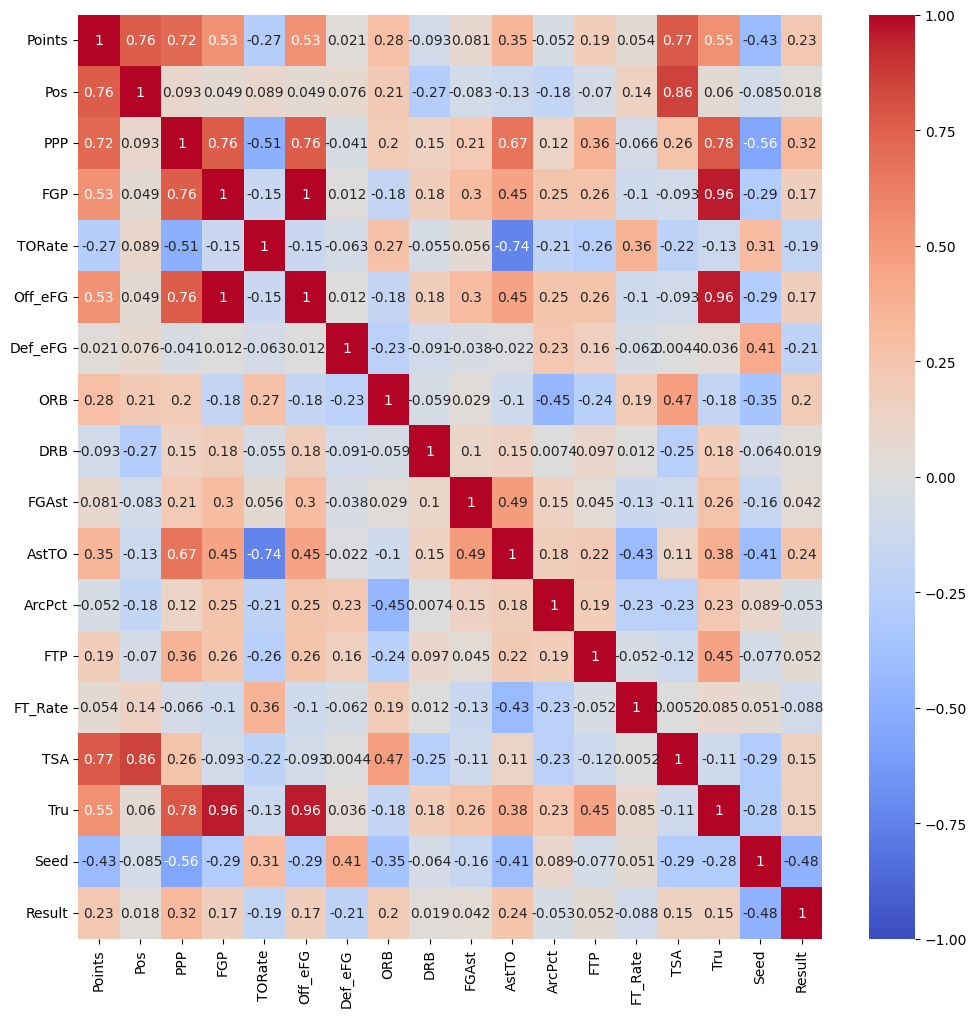

In [27]:
corr_matrix = round(Final.corr(),4)
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1)

1248
1248


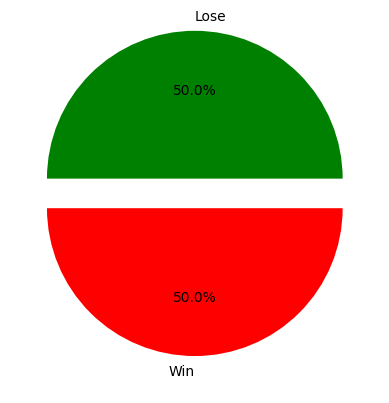

In [28]:
print(Final['Result'].value_counts()[0])
print(Final['Result'].value_counts()[1]) #making sure everything
                                        #is right
                                        #The amount of Losses and wins
                                        #Should be 1:1 Hence:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc_params

plt.pie(Final['Result'].value_counts(),[0.2,0],labels=['Lose','Win'],autopct='%1.1f%%',colors=['green','red'])
plt.show()

In [29]:
Y = Final['Result']
correlation=Final.corr().abs()
largest_8=correlation.nlargest(8, 'Result').index.tolist()
largest_8 = largest_8[1:]
X = Final[largest_8]
display(X)

Seed       PPP     AstTO     Points   Def_eFG       ORB    TORate
0      0.0 -0.021731 -0.066843  -1.593103  0.024351 -0.012949  0.012144
1    -15.0  0.081979  0.216026  17.421182 -0.020695  0.014010 -0.022759
2      3.0  0.040148 -0.089779   1.448276  0.039381  0.031277  0.006999
3      5.0 -0.040490 -0.455413   0.102403  0.026953  0.019944  0.061465
4     -1.0 -0.020811  0.128020   2.082759 -0.001493  0.013497 -0.011825
...    ...       ...       ...        ...       ...       ...       ...
2491   9.0 -0.018155  0.205663  -3.770053  0.065674 -0.113379 -0.034044
2492   7.0 -0.107946 -0.502481 -11.342738 -0.054255  0.006199  0.033481
2493   1.0  0.011515  0.078058  -5.951872  0.001987 -0.028774 -0.026363
2494  -6.0  0.072795  0.457073   2.661319 -0.027483  0.016951 -0.014964
2495   7.0 -0.025872  0.021984  -1.073084  0.025602 -0.035479 -0.012036

[2496 rows x 7 columns]